 <img style="float: left;" src="https://i.redd.it/ar1f8fux9kp51.png" width=300 alt="" />

# Counts

### Task: Write a function that takes a list and returns a dictionary where the list items are dict keys and the value is how often the item appears in the original list

```python
counts(listIn: list, case=False, stringAll=False, sortVals=False)
```

The function, `counts()`, takes an input of a list <b>(listIn)</b> and returns a single output of a dictionary <b>(outDict)</b>. The function starts by creating an empty dictionary **outDict**. The function loops through each item in the list and if the item is not already in dict it adds it as a key with a value of 1. If the same item apprears in the list again then the value is incremented by 1 each time it appears.

There are three optional parameters for counts(), **case**, **stringAll** and **sortVals** . 

By default **stringAll** is set to `False`. If stringAll is set to `True` each item is converted to a string before it is checked. This allows for more accurate counting of numbers if there is a mix of data types in the list. For example 1 and "1" would not counted as two seperate entries but insetad both counted as "1". 

By default **case** is set to `False`. If case is set to `True` each item in the list is set to lowercase before it is checked to see if it is in the dictionary. This allows letters to be counted together regardless of whether they are lower or uppercase.

By default **sortVals** is set to `False`. If sort is set to `True` the at the end of the function a sorting loop uses the dict method `sorted()` to get a list of sorted keys for the dict. It then uses this list to add the key-value pairs from dict to a new dictionary sortdict. When that is complete it returns sortdict instead of dict.

In [38]:
def counts(listIn: list, case=False, stringAll=False, sortVals=False) -> dict:
    outDict = {} # creates an empty dictionary
    
    try:
        for i in listIn: # loop through each item in list   

            if stringAll == True:
                i = str(i)
            if case == True and type(i) == str:
                i = i.lower()

            try:
                if i in outDict:

                    # if the item is already in list increase its value by 1
                    outDict[i] += 1

                    # otherwise add the item to the dict setting it's value to 1
                else:
                    outDict[i] = 1  

                    # exception handling for type errors
            except TypeError: 
                i_type = str(type(i))
                print(f"We had trouble counting {i} because it was a {i_type}")
                
        if sortVals == True:
            sortDict = dict(sorted(outDict.items(), key=lambda item: item[1], reverse=True))
                
            return sortDict
        
        elif sortVals == False: 
            return outDict
        
    except TypeError: # exception handling for non-iterable arguments
            
        print(f"Error: invalid argument {str(type(ls))}")
        print("counts() function takes a list or string as argument")


## Counts Examples
***

#### Example 1 - basic operation
The below example shows how the `counts()` function takes the list **ls** and returns a dictionary to the variable **countList**. That dictionary has each item from ls as the key and how many times the item appears as the value. In this case we can see 1 appears 10 times, 2 appears once and so on.

In [15]:
ls = [1, 2, 3, 4, 1, 5, 6, 
        7, 1, 5, 9, 4, 1, 1,
        6, 33, 1, 4, 1, 1, 1,
        5, 8, 9, 6, 4, 1, 6, 9]

countList = counts(ls)

print(countList)

{1: 10, 2: 1, 3: 1, 4: 4, 5: 3, 6: 4, 7: 1, 9: 3, 33: 1, 8: 1}


#### Example 2 - strings and sorting output
The below example shows how the counts function can be used on characters in a string. When a string is entered as the input variable the function treats the string as a list where each character is a item [2]. In this example we set the `sortVals` argument to `True`. This sorts the output by key-value pair with the highest value first. In practice this allows us to easily see which character apeears most often in the input list.

In [40]:
x = counts("MAry hAd a little Lamb", sortVals=True)

print(x)

{' ': 4, 'A': 2, 'a': 2, 'l': 2, 't': 2, 'M': 1, 'r': 1, 'y': 1, 'h': 1, 'd': 1, 'i': 1, 'e': 1, 'L': 1, 'm': 1, 'b': 1}


#### Example 3 - case sensitive
In the below example we convert all values to lowercase by setting the `case` variable to `True`. This allows us to count each character regardless of whether it is capitalised or not. 

In the output we can see that now M & m are included as a single key, as are A & a and L & l.

In [4]:
y = counts("MAry hAd a little Lamb", case=True)

print(y)

{'m': 2, 'a': 4, 'r': 1, 'y': 1, ' ': 4, 'h': 1, 'd': 1, 'l': 3, 'i': 1, 't': 2, 'e': 1, 'b': 1}


#### Example 4 - strings and ints
The below example show how the counts function works on list of strings and numbers. n the first instance of the function if counts 1 and "1" as seperate entities. 

For the second variable b we set the `stringAll` argument to **True** which converts all items to strings. This means now 1 and "1" are both counted as "1" giving us a better understanding of how many occurances actually happen in the list.

In [41]:
a = counts([1, 2, "1", "2", 6, 7, 8, "3", "4", "1"])

b = counts([1, 2, "1", "2", 6, 7, 8, "3", "4", "1"], stringAll=True)

print(a)
print(b)

{1: 1, 2: 1, '1': 2, '2': 1, 6: 1, 7: 1, 8: 1, '3': 1, '4': 1}
{'1': 3, '2': 2, '6': 1, '7': 1, '8': 1, '3': 1, '4': 1}


#### Example 5 - exceptions

The below example shows how the counts function operates when the list contains items that cannot be counted such as lists and dictionaries. The items are not counted but a message is printed to the user to give them more information.

In [7]:
Z = counts([1, "yes", ("yes", "no"), ["no", "yes"], 
            {'m': 2, 'a': 4, 'r': 1, 'y': 1, ' ': 4, 'h': 1, 'd': 1, 'l': 3, 'i': 1, 't': 2, 'e': 1, 'b': 1},
            1, 2, 3, 4])
print(Z)

We had trouble counting ['no', 'yes'] because it was a <class 'list'>
We had trouble counting {'m': 2, 'a': 4, 'r': 1, 'y': 1, ' ': 4, 'h': 1, 'd': 1, 'l': 3, 'i': 1, 't': 2, 'e': 1, 'b': 1} because it was a <class 'dict'>
{1: 2, 'yes': 1, ('yes', 'no'): 1, 2: 1, 3: 1, 4: 1}


The final example here demostrates how the function handles an argument that cannot be iterated over such as an integer. The error message lets the user know an incorrect variable type has been entered.

In [8]:
counts(1235)

Error: invalid argument <class 'int'>
counts() function takes a list or string as argument


<img style="float: left;" src="https://i.pinimg.com/originals/3a/34/6b/3a346b536b6a6f5de274bbbff7908ec0.gif" alt="" />

# dicerolls
***
### Task: Write a Python function called dicerolls that simulates rolling dice. The function should take 2 parameters k, the number of dice to roll, and n, the number of times to roll the dice.

The function `dicerolls()` takes 2 parameters **k** and **n** and returns a dictionary of simulated dicerolls where the keys are the numbers rolled and the values are how many times that number was rolled in n trials.
```python
dicerolls(k: int, n: int)
```
- **k**: The k parameter sets how many dice should be used in the simulation. k must be a int.
- **n**: The parameter n represents the number of trials of the simulation of rolling k number of dice. n must be an int

The function begins by defining a function for generating a dice roll `dice()`. dice() uses the stdlib module random to choose a number at random between 1-6 inclusive of 6.

Next the empty dictionary dict is intialised. Then we use a `for loop` to simulate the dice roll n times, range(0, n). For each trial we use a variable `roll` to store the value of the dice roll. Again we use another for loop to execute the dice function k times to simulate k amount of dice being rolled.

Now that we have a result of the roll we use an `if statement` to check if that result has been been stored in our dictionary dict. If roll already exists as a key we can increment the value by 1. If the key does not exist yet we can add it with an intial value of 1.

The dictionary dict is created in no particular order. Because we want to analyse the results we would prefer to have the keys in order ranging from smallest to largest roll. We use the sorted() function and a short for loop to create a new dictionary `sortdict` with the keys in order from smallest to largest. The programme ends as it returns sortdict as its return value.

In [3]:
import random
import numpy as np
import seaborn as sns

In [4]:
def dicerolls(k: int, n: int) -> dict:
    
    def dice():
        roll = random.randint(1,6)
        return roll  
    
    dict = {}
    for i in range(0,n):
        roll = 0
        for i in range(0,k):
            roll += dice()
                    
        if roll in dict:
            # if the item is already in list increase its value by 1 
            dict[roll] += 1
            # otherwise add the item to the dict setting it's value to 1
        else:
            dict[roll] = 1
    sortdict = {}
    for i in sorted(dict):
        sortdict[i] = dict[i]   
        
    return sortdict
    

## dicerolls Examples
***

#### Example 1 - one dice

In the first example here we simulate 1 dice being rolled 1000 times. As each number from 1-6 is equally likely to occur We would expect to see a uniform distribution of values, with some random variation. If there was a significant bias towards on value or another we would have to investigate the function to make sure no errors were made. 

We use the Seaborn barplot function below to plot the occurances of each value between 1-6. While there is some variation between values each time we run the simulation, in general there is an even spread accross the six outcomes. If we increase the value of **n** we would expect to see less variation and a more uniform distribution as the number of trials increased.

In [48]:
x = dicerolls(k=1, n=1000)

print(x)

{1: 186, 2: 163, 3: 166, 4: 170, 5: 158, 6: 157}


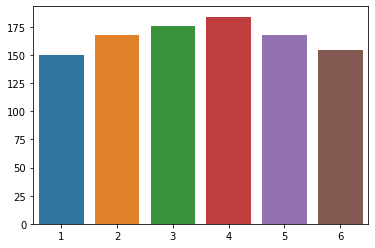

In [47]:
sns.barplot(x=list(x.keys()), y=list(x.values()))

#### Example 2 - Two dice, one thousand trials

In the second example here we simulate 2 dice being rolled 1000 times. The range of possible outcomes is now 2-12. We should also see a change in the distribution of values as now each value is no longer equally likely to occur. The values 2 and 12 are least likely to occur, they should only occur 1 time in 36 trials or 2.78% of the time. The value 7 should occur most often, 6 times per 36 trials or 16.67% of the time. What we should see is output that follows a normal distribution.

We use the Seaborn barplot function below to visualise the output of the 2 dice simulation. While there is some random variation, in general the central value of **7** occurs most often and each subsequent value occurs less often as you move away from 7 in each direction. This is the result we would expect and with a larger trial **n** we would expect to see less variation.

In [57]:
y = dicerolls(k=2, n=1000)

print(y)

{2: 27, 3: 54, 4: 82, 5: 121, 6: 145, 7: 177, 8: 153, 9: 98, 10: 67, 11: 52, 12: 24}


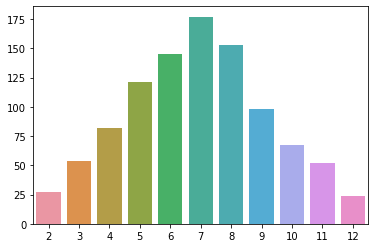

In [58]:
sns.barplot(x=list(y.keys()), y=list(y.values()))

#### Example 3 - 5 dice 10000 trials

In the final example here we increase the simulation to 5 dice being rolled 10000 times. We must increase the trials here to get an accurate picture of the result as the number of possible outcomes are 6x6x6x6x6 which is 7776. If we only did 1000 trials as in the previous examples the sample would not be reliable as it would be too small be considered representative of the overall distribution. 

The range of possible outcomes is now 5-30. The output should still, like the second example, follow a normal distribution around the central values 17 & 18 both of which should occur most often at 10.03% of the time. The outer limit values 5 and 30 will only occur 0.01% of the time, the rest of the possible outcomes should form the normal distribution as you move away from the central values to the outer limit values.

We use the Seaborn barplot function below to visualise the output of the 5 dice simulation. While there is some random variation. While again there is some random variation in general 17 & 18 will occur the most often and the rest of the values form a normal distribution reducing in occurance as they move away from these central values. 

In [65]:
z = dicerolls(k=5, n=10000)

print(z)

{5: 1, 6: 5, 7: 14, 8: 50, 9: 89, 10: 160, 11: 278, 12: 416, 13: 520, 14: 689, 15: 834, 16: 978, 17: 1011, 18: 1017, 19: 917, 20: 845, 21: 682, 22: 518, 23: 398, 24: 258, 25: 163, 26: 95, 27: 39, 28: 18, 29: 3, 30: 2}


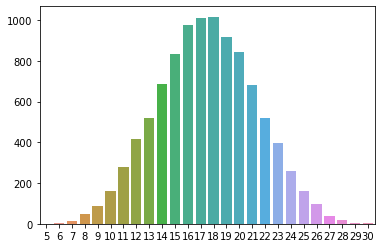

In [66]:
sns.barplot(x=list(z.keys()), y=list(z.values()))

<img style="float: left;" src="https://media1.tenor.com/images/507d58a626fa15cb0b57e57f7a1cb873/tenor.gif" alt="" />

# coin_flip
***

In [67]:
from numpy.random import binomial
import seaborn as sns

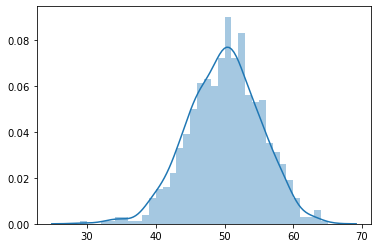

In [97]:
n, p = 100, .5
s = binomial(n, p, 1000)

sns.distplot(s, bins=len(range(s.min(),s.max())))



# References

1. w3schools. Python Functions. https://www.w3schools.com/python/python_functions.asp
2. GeeksforGeeks, (2018). Iterate over characters of a string in Python. https://www.geeksforgeeks.org/iterate-over-characters-of-a-string-in-python/
3. 

sort by value, dict https://stackoverflow.com/questions/613183/how-do-i-sort-a-dictionary-by-value

sorting https://docs.python.org/3/howto/sorting.html

dictionaries https://docs.python.org/3/tutorial/datastructures.html

dict.items() https://www.w3schools.com/python/python_dictionaries_access.asp

lambda https://www.w3schools.com/python/python_lambda.asp

2 dice probabilities https://statweb.stanford.edu/~susan/courses/s60/split/node65.html

dice calculator https://anydice.com/
















